In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [1]:
data_dir    = "/Users/praneeth/Desktop/newplantvillage/datasets"
img_height  = 128
img_width   = 128
batch_size  = 32
val_split   = 0.2
seed        = 123

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 62979 files belonging to 34 classes.
Using 50384 files for training.
Found 62979 files belonging to 34 classes.
Using 12595 files for validation.


In [5]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()

/Users/praneeth/Desktop/newplantvillage/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 34)             │         4,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,026 (12.62 MB)

 Trainable params: 3,309,026 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


2025-05-05 21:38:59.646820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:15: Filling up shuffle buffer (this may take a while): 795 of 1000
2025-05-05 21:39:11.322993: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:15: Filling up shuffle buffer (this may take a while): 961 of 1000
2025-05-05 21:39:13.613357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 360s 212ms/step - accuracy: 0.2828 - loss: 2.5246 - val_accuracy: 0.7766 - val_loss: 0.7509
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 305s 193ms/step - accuracy: 0.6447 - loss: 1.1341 - val_accuracy: 0.8457 - val_loss: 0.5104
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 318s 202ms/step - accuracy: 0.7248 - loss: 0.8494 - val_accuracy: 0.8739 - val_loss: 0.4047
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 306s 195ms/step - accuracy: 0.7730 - loss: 0.7020 - val_accuracy: 0.8811 - val_loss: 0.3658
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 277s 176ms/step - accuracy: 0.8063 - loss: 0.5905 - val_accuracy: 0.9094 - val_loss: 0.2953
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 281s 178ms/step - accuracy: 0.8310 - loss: 0.5060 - val_accuracy: 0.9159 - val_loss: 0.2681
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 281s 178ms/step - accuracy: 0.8576 - loss: 0.4250 - val_accuracy: 0.9094 - val_loss: 0.2989
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 277s 176ms/step - accuracy: 0.8

In [12]:
%pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 30.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


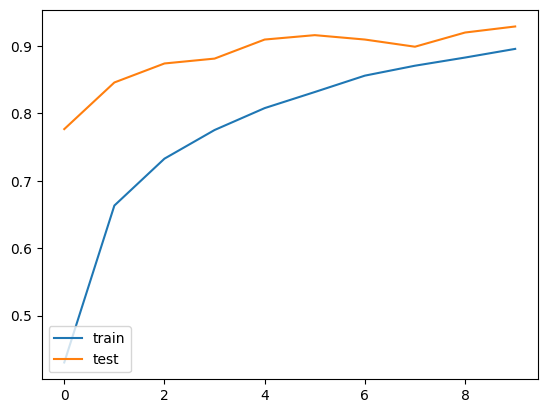

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train','test'], loc='lower left')

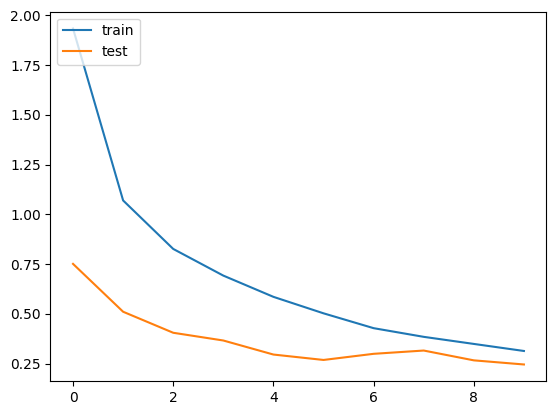

In [19]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

In [22]:
%pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 42.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 40.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [24]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [26]:
%pip install scikit-learn seaborn matplotlib


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 31.2 MB/s eta 0:00:00 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]m2/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [28]:
# 1) Create the raw dataset
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 2) Pull out the class names immediately
class_names = raw_train_ds.class_names
print("Classes:", class_names)

# 3) Now wrap it with cache/prefetch for performance
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Same for validation
raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = raw_val_ds.cache().prefetch(tf.data.AUTOTUNE)


Found 62979 files belonging to 34 classes.
Using 50384 files for training.
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mo

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# extract true labels
true_labels = np.concatenate([y.numpy() for x, y in val_ds], axis=0)

# predict
y_prob  = model.predict(val_ds)
y_pred  = np.argmax(y_prob, axis=1)

# report
print(classification_report(true_labels, y_pred, target_names=class_names))


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.94      0.87      0.91       410
                            Apple___Black_rot       0.97      0.98      0.97       422
                     Apple___Cedar_apple_rust       0.95      0.97      0.96       349
                              Apple___healthy       0.92      0.94      0.93       391
                          Blueberry___healthy       0.95      0.97      0.96       359
     Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       343
            Cherry_(including_sour)___healthy       0.94      0.99      0.97       371
                            Grape___Black_rot       0.97      0.82      0.89       394
                 Grape___Esca_(Black_Measles)       0.89      0.97      0.93       400
   Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.96      0.98      0.97       349

In [30]:
model.save("plant_disease_model.h5")
print("Model saved to plant_disease_model.h5")

Model saved to plant_disease_model.h5
